In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

# 1. Find the count of variables by datadtypes and subset for numeric variables only

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


dtypes: float64(65), int64(41), object(16)

In [7]:
df.dtypes # datatypes of all the columns/variables

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [9]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Pick only numeric variables

In [10]:
df.select_dtypes(include=['float64','int64']).shape # 65+41 = 106 columns

(307511, 106)

In [11]:
num_var_df=df.select_dtypes(include=['float64','int64'])

In [12]:
num_var_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
num_var_df.dtypes.value_counts()

float64    65
int64      41
dtype: int64

# 2. Find the top 5 highly correlated variables

In [17]:
# num_var_df is our dataframe of numerical variables only. so all variables(106) me correlation can be established

In [18]:
num_var_df.corr() # dataset is too huge , will take 12 sec

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [ ]:
# correlation heatmap
correlation = num_var_df.corr()
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap="Reds")
# since 106 variables, heatmap ki esi ki taisi ho gyi

In [22]:
import numpy as np

In [23]:
correlation.shape

(106, 106)

In [74]:
# lets load breast cancer dataset and do the 2nd question on that
df = pd.read_csv('/content/breast cancer dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


let's drop all the non numeric features for now

In [28]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [75]:
df = df.drop(columns=['diagnosis','id'])

In [76]:
correl = df.corr() # by default method='pearson'

<Axes: >

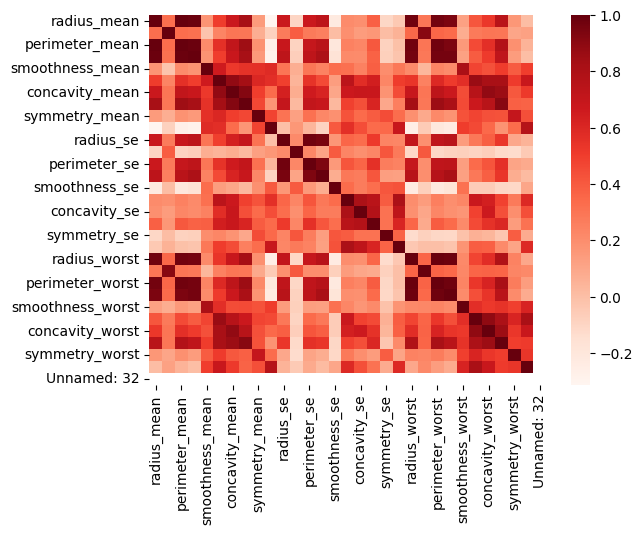

In [33]:
sns.heatmap(correl,cmap='Reds')

In [34]:
np.ones(correl.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1

In [35]:
# upper triangle == lower triangle in correlation matrix, diagonal = all '1'. Hence symmatric matrix
np.triu(np.ones(correl.shape)) # all lower triangle will become 0 now

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0

In [36]:
np.triu(np.ones(correl.shape),k=1) # uppertriangualr m.. are converted to one, and lower with principle diagonal = 0

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0

In [37]:
np.triu(np.ones(correl.shape),k=1).astype(np.bool)
# overall principle diagonal with lower triangle is false and rest all true now

<ipython-input-37-e702351cdf7a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(correl.shape),k=1).astype(np.bool)


array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],


In [38]:
correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool))
# only upper triangle have values now
# just starting me correl. kr diya to get same thing done on correl dataframe

<ipython-input-38-181e10fb7e6b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool))


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,NaN,NaN,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,NaN


In [47]:
correl.where(np.triu(np.ones(correl.shape),k=1).astype(bool)).unstack()

radius_mean  radius_mean               NaN
             texture_mean              NaN
             perimeter_mean            NaN
             area_mean                 NaN
             smoothness_mean           NaN
                                        ..
Unnamed: 32  concavity_worst           NaN
             concave points_worst      NaN
             symmetry_worst            NaN
             fractal_dimension_worst   NaN
             Unnamed: 32               NaN
Length: 961, dtype: float64

In [48]:
correl.where(np.triu(np.ones(correl.shape),k=1).astype(bool)).unstack().reset_index()  # correlation matrix se dataframe banana : # .unstack().reset_index()
# to make it completely look like dataframe

,level_0,level_1,0
0,radius_mean,radius_mean,NaN
1,radius_mean,texture_mean,NaN
2,radius_mean,perimeter_mean,NaN
3,radius_mean,area_mean,NaN
4,radius_mean,smoothness_mean,NaN
...,...,...,...
956,Unnamed: 32,concavity_worst,NaN
957,Unnamed: 32,concave points_worst,NaN
958,Unnamed: 32,symmetry_worst,NaN
959,Unnamed: 32,fractal_dimension_worst,NaN


In [41]:
correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
# rename column names

<ipython-input-41-a19f94e282bf>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})


,var1,var2,corr
0,radius_mean,radius_mean,NaN
1,radius_mean,texture_mean,NaN
2,radius_mean,perimeter_mean,NaN
3,radius_mean,area_mean,NaN
4,radius_mean,smoothness_mean,NaN
...,...,...,...
956,Unnamed: 32,concavity_worst,NaN
957,Unnamed: 32,concave points_worst,NaN
958,Unnamed: 32,symmetry_worst,NaN
959,Unnamed: 32,fractal_dimension_worst,NaN


In [49]:
var_corr_as_table = correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
var_corr_as_table['corr']
# 30*30 = 960 correlation values, but LTM + PD all none.

<ipython-input-49-0edce1eb6f4b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var_corr_as_table = correl.where(np.triu(np.ones(correl.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
956   NaN
957   NaN
958   NaN
959   NaN
960   NaN
Name: corr, Length: 961, dtype: float64

In [51]:
# -ve to positive conversion : of full culumn , since +ve and -ve correlattion are still high correlation. -0.9 and +0.9 are high correlation. 0,-0.1, 0.1 are low corrlations
var_corr_as_table['corr'] = abs(var_corr_as_table['corr'])

In [52]:
# dropna to getridoff all nan rows
var_corr_as_table.dropna(subset=['corr']) # only correlation column se drop krna

,var1,var2,corr
31,texture_mean,radius_mean,0.323782
62,perimeter_mean,radius_mean,0.997855
63,perimeter_mean,texture_mean,0.329533
93,area_mean,radius_mean,0.987357
94,area_mean,texture_mean,0.321086
...,...,...,...
923,fractal_dimension_worst,smoothness_worst,0.617624
924,fractal_dimension_worst,compactness_worst,0.810455
925,fractal_dimension_worst,concavity_worst,0.686511
926,fractal_dimension_worst,concave points_worst,0.511114


In [53]:
var_corr_as_table.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False) # remove nan and sort in descending order based on corr

,var1,var2,corr
62,perimeter_mean,radius_mean,0.997855
702,perimeter_worst,radius_worst,0.993708
93,area_mean,radius_mean,0.987357
95,area_mean,perimeter_mean,0.986507
733,area_worst,radius_worst,0.984015
...,...,...,...
591,fractal_dimension_se,perimeter_mean,0.005523
902,fractal_dimension_worst,area_mean,0.003738
670,texture_worst,fractal_dimension_se,0.003195
701,perimeter_worst,fractal_dimension_se,0.001000


In [55]:
# first 10 highly correlated variables
var_corr_as_table.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
62,perimeter_mean,radius_mean,0.997855
702,perimeter_worst,radius_worst,0.993708
93,area_mean,radius_mean,0.987357
95,area_mean,perimeter_mean,0.986507
733,area_worst,radius_worst,0.984015
735,area_worst,perimeter_worst,0.977578
382,perimeter_se,radius_se,0.972794
684,perimeter_worst,perimeter_mean,0.970387
620,radius_worst,radius_mean,0.969539
622,radius_worst,perimeter_mean,0.969476


**Mujhe krna hota toh, itni mehnat na krta shayad, kuch esa krta, but duplicates me value milti, First approach seams complex, but giving the complete answer**

In [57]:
correl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN


In [58]:
np.fill_diagonal(correl.values,0) # now all the diagonal values will be 0

In [59]:
correl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
radius_mean,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.323782,0.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN


In [60]:
# convert correlation matrix to Pandas Series . Remember series, not dataframe
corr_stack = correl.stack()

to get as pandas DataFrame, use df.unstack()

In [63]:
corr_stack.shape

(901,)

In [65]:
print(corr_stack)

radius_mean              radius_mean                0.000000
                         texture_mean               0.323782
                         perimeter_mean             0.997855
                         area_mean                  0.987357
                         smoothness_mean            0.170581
                                                      ...   
fractal_dimension_worst  concavity_worst            0.686511
                         concave points_worst       0.511114
                         symmetry_worst             0.537848
                         fractal_dimension_worst    0.000000
Unnamed: 32              Unnamed: 32                0.000000
Length: 901, dtype: float64


In [66]:
# get top 10 highly correlated variable pairs
top_correlations = corr_stack.nlargest(10)

In [67]:
print(top_correlations)
# but as expected; IF A ,B are correlated; B,A ka same correlation are printed: = same correlation twice

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
perimeter_mean   area_mean          0.986507
area_mean        perimeter_mean     0.986507
radius_worst     area_worst         0.984015
area_worst       radius_worst       0.984015
dtype: float64


In [78]:
# so stick to your first approach:
# once again puri ek bar

# Assuming 'correlation' is your correlation matrix with diagonal values set to 0
correlation = df.corr()
np.fill_diagonal(correlation.values, 0)

# Select the upper triangle of the correlation matrix
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# Get the top 20 unique correlation values
top_correlations = upper_triangle.unstack().sort_values(ascending=False).head(20)

# Select the top 10 unique correlation pairs
top_10_correlations = top_correlations.head(10)

# Display the top 10 unique correlations
print(top_10_correlations)

# drop_duplicates() ka use be kr skte hain, pandas dataframe me to get rid of duplicated rows in pandas dataframe

perimeter_mean   radius_mean        0.997855
perimeter_worst  radius_worst       0.993708
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
area_worst       radius_worst       0.984015
                 perimeter_worst    0.977578
perimeter_se     radius_se          0.972794
perimeter_worst  perimeter_mean     0.970387
radius_worst     radius_mean        0.969539
                 perimeter_mean     0.969476
dtype: float64


<ipython-input-78-1470638235a0>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))


# Q3. converting the correlation matrix into a pandas dataframe, first set all diagonal to 0, then drop duplicates from it
but wait, duplicated row me ek bar A, B hoga, and dusri bar B,A hoga so python ko vo dono duplicated nhi dikhengi. So think

In [90]:
# Also alternative of UTM vala solution, saste me top 10 correlation bhi de dega
correlation = df.corr(method='spearman')

# set diagonal values to 1
np.fill_diagonal(correlation.values,0)

# convert correlation matrix to pandas dataframe
correlation_df = pd.DataFrame(correlation.stack(),columns=['Correlation'])
# the above line will give, each variable ka all other variables ke sath kya correlation hai, all at once, then the next variable

# Reset the index to get Variable 1 and Variable 2 as separate columns
correlation_df.reset_index(inplace=True)

# Rename columns for clarity
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Drop duplicates
correlation_df_no_duplicates = correlation_df[correlation_df['Variable 1'] < correlation_df['Variable 2']]
# out of 2 rows for same pair of variables(A,B),(A,A) ; only A,A vali row will be retained.
# also < hone se (A,A) vali row bhi chali jayegi. Kya bad hai, upar ka UTM vala kam itna sasta ho gya

correlation_df_no_duplicates

,Variable 1,Variable 2,Correlation
1,radius_mean,texture_mean,0.340956
4,radius_mean,smoothness_mean,0.148510
8,radius_mean,symmetry_mean,0.120242
10,radius_mean,radius_se,0.550247
11,radius_mean,texture_se,-0.144499
...,...,...,...
890,fractal_dimension_worst,radius_worst,0.127449
891,fractal_dimension_worst,texture_worst,0.193191
892,fractal_dimension_worst,perimeter_worst,0.179003
894,fractal_dimension_worst,smoothness_worst,0.614796


In [91]:
# # Sort the DataFrame by the 'Correlation' column
correlation_df_no_duplicates = correlation_df_no_duplicates.sort_values(by="Correlation",ascending=False)

# so Q2. Ka kam bhi ho gya, top 10 highly correlated unique pairs :
correlation_df_no_duplicates.head(10)

# correlation thoda different aaya as spearman use kiya tha. No worries

,Variable 1,Variable 2,Correlation
90,area_mean,radius_mean,0.999602
710,area_worst,radius_worst,0.998891
60,perimeter_mean,radius_mean,0.997802
92,area_mean,perimeter_mean,0.997068
680,perimeter_worst,radius_worst,0.993548
712,area_worst,perimeter_worst,0.992433
80,perimeter_mean,radius_worst,0.981244
692,area_worst,perimeter_mean,0.980864
113,area_mean,area_worst,0.980264
110,area_mean,radius_worst,0.979258


In [92]:
# also one thing you can do , make all correlation to their absolute values, since higly correlated me negative bhi aate hain, then do the same

correlation_df_no_duplicates['Correlation'] = correlation_df_no_duplicates['Correlation'].abs()

# Display the updated dataframe
correlation_df_no_duplicates

,Variable 1,Variable 2,Correlation
90,area_mean,radius_mean,0.999602
710,area_worst,radius_worst,0.998891
60,perimeter_mean,radius_mean,0.997802
92,area_mean,perimeter_mean,0.997068
680,perimeter_worst,radius_worst,0.993548
...,...,...,...
704,area_worst,smoothness_se,0.323724
14,radius_mean,smoothness_se,0.326385
104,area_mean,smoothness_se,0.327431
270,fractal_dimension_mean,radius_mean,0.349931


In [93]:
# no apply operations to get top 10, correlated values

# again need to sort , imagine

# # Sort the DataFrame by the 'Correlation' column
correlation_df_no_duplicates_final_sorted = correlation_df_no_duplicates.sort_values(by="Correlation",ascending=False)

# so Q2. Ka kam bhi ho gya, top 10 highly correlated unique pairs :
correlation_df_no_duplicates_final_sorted.head(10)

,Variable 1,Variable 2,Correlation
90,area_mean,radius_mean,0.999602
710,area_worst,radius_worst,0.998891
60,perimeter_mean,radius_mean,0.997802
92,area_mean,perimeter_mean,0.997068
680,perimeter_worst,radius_worst,0.993548
712,area_worst,perimeter_worst,0.992433
80,perimeter_mean,radius_worst,0.981244
692,area_worst,perimeter_mean,0.980864
113,area_mean,area_worst,0.980264
110,area_mean,radius_worst,0.979258


#Q4. To observe the customer behaviour after couple of transections, fetch the third transection

In [98]:
transections = pd.read_excel('/content/Sample_Superstore.xls')
transections.shape

(9994, 21)

In [99]:
transections.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [107]:
transections=transections.sort_values(by=['Customer Name','Order Date']) # increasing order me sorting
# so first sorting based on customer name, if customer name is same, do sorting based on Order date
transections

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
8222,8223,CA-2014-152905,2014-02-18,2014-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,0
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,259.960,4,0.0,124.7808,4
3040,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,South,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,5
3814,3815,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,TEC-PH-10002824,Technology,Phones,Jabra SPEAK 410 Multidevice Speakerphone,823.960,5,0.2,51.4975,6
3815,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,OFF-PA-10004965,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,7


In [102]:
# Adding one more column
transections['counter'] = transections.groupby(['Customer Name']).cumcount()
# cumcount by customer name = same customer name ko 0,1,2,3,... dekar, again new names ko 1,2,3.. dena; for all the customer names

In [106]:
transections.head(9)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
8222,8223,CA-2014-152905,2014-02-18,2014-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,0
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
8802,8803,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,5
7163,7164,CA-2014-122070,2014-04-22,2014-04-24,Second Class,AH-10030,Aaron Hawkins,Corporate,United States,Troy,...,East,OFF-EN-10004773,Office Supplies,Envelopes,Staple envelope,247.840,8,0.0,121.4416,0
7164,7165,CA-2014-122070,2014-04-22,2014-04-24,Second Class,AH-10030,Aaron Hawkins,Corporate,United States,Troy,...,East,OFF-BI-10004970,Office Supplies,Binders,"ACCOHIDE 3-Ring Binder, Blue, 1""",9.912,3,0.2,3.3453,1
5354,5355,CA-2014-113768,2014-05-13,2014-05-19,Standard Class,AH-10030,Aaron Hawkins,Corporate,United States,Los Angeles,...,West,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",279.456,6,0.2,20.9592,2


# Q5. How would you find duplicate values in a dataframe for a column

In [108]:
# to know is there any duplicates, i.e. completely similar rows.
transections.duplicated() # all rows ke bare me bol diya are they duplicated or not

8222    False
4961    False
4962    False
4963    False
8801    False
        ...  
5898    False
3040    False
3814    False
3815    False
8341    False
Length: 9994, dtype: bool

In [110]:
transections.duplicated().value_counts() # 0 True = total 0 non duplicated rows

False    9994
dtype: int64

In [111]:
transections.duplicated(subset=['Customer Name']) # ab keval ek column me values ke duplicate hone ya na hone ki checking hogi
# by default keep='first' => by default all the first customer name, will be considered as Non Duplicated. If same name uske neeche aata hai to duplicated mana jayega
# 8222 index is occuring first time for name XYZ, so it will be considered non duplicated while, same name ki all other rows will be considered as duplicated

8222    False
4961     True
4962     True
4963     True
8801     True
        ...  
5898     True
3040     True
3814     True
3815     True
8341     True
Length: 9994, dtype: bool

In [113]:
# let's know how many have done shopping once only, and how many more than once; It is possible ki do persons ke name same ho jayen => Unko bhi ek me count kr lega as we are checking duplicates just by names, not by id. But those cases, hopefully will be very less.
transections.duplicated(subset=['Customer Name']).value_counts()
# in 793 me ve bhi shamil hain jo keval ek bar shopping kiye and jinhone multiple times bhi kiya, unki first occurance bhi shamil hai
# multiple krne valon ki bhi fisrt shopping is considered as non duplicated
# by default keep = first => multiple times shopping krne valon ki first occurance will be counted as non-duplicate
# mja to tb aayega jb keep=False kr denge. All names jinhone >1 times shopping kiya, ke ek bhi name count nhi honge. As we are not allowing any attempts of those persons who have attempted multiple times. Just single time attemp kiye hue ko hi we are counting as unique, by keep = false
# also, keep = 'first' krne se, we can count total number of unique person visited. it is the number of false values
# keep = first ke case me, number of false values = (multiple times visitprs ki first occurance)+(single time visiters ki to definately ek hi occurance hogi)

True     9201
False     793
dtype: int64

In [116]:
transections[transections.duplicated(subset=['Customer Name'], keep='first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
8802,8803,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,259.960,4,0.0,124.7808,4
3040,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,South,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,5
3814,3815,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,TEC-PH-10002824,Technology,Phones,Jabra SPEAK 410 Multidevice Speakerphone,823.960,5,0.2,51.4975,6
3815,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,OFF-PA-10004965,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,7


The keep parameter in the duplicated() function of a Pandas DataFrame determines which duplicates to mark as True and which to mark as False. It has three options:

**keep='first':** Marks all duplicates as True except for the first occurrence. The first occurrence is considered not a duplicate.

**keep='last':** Marks all duplicates as True except for the last occurrence. The last occurrence is considered not a duplicate.

**keep=False:** Marks all occurrences of duplicates as True. No occurrence is considered not a duplicate.

It selects all rows in the DataFrame transections where the 'Customer Name' column has duplicate values, but only marks the first occurrence of each duplicate as False and the subsequent occurrences as True. In other words, it keeps the first occurrence of each unique 'Customer Name' and marks the rest as duplicates.

This is useful when you want to identify and filter out duplicate entries based on a specific column, keeping only the first occurrence of each unique value.

**print(transections[transections.duplicated(subset=['Customer Name'], keep='first')])**

this will print all the rows except the first occurances of each customer names row

In [119]:
transections[transections.duplicated(subset=['Customer Name'], keep='first')].head(9)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
8802,8803,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,5
7164,7165,CA-2014-122070,2014-04-22,2014-04-24,Second Class,AH-10030,Aaron Hawkins,Corporate,United States,Troy,...,East,OFF-BI-10004970,Office Supplies,Binders,"ACCOHIDE 3-Ring Binder, Blue, 1""",9.912,3,0.2,3.3453,1
5354,5355,CA-2014-113768,2014-05-13,2014-05-19,Standard Class,AH-10030,Aaron Hawkins,Corporate,United States,Los Angeles,...,West,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",279.456,6,0.2,20.9592,2
5355,5356,CA-2014-113768,2014-05-13,2014-05-19,Standard Class,AH-10030,Aaron Hawkins,Corporate,United States,Los Angeles,...,West,OFF-PA-10003063,Office Supplies,Paper,EcoTones Memo Sheets,8.000,2,0.0,3.8400,3
6128,6129,US-2014-158400,2014-10-25,2014-10-28,First Class,AH-10030,Aaron Hawkins,Corporate,United States,San Francisco,...,West,OFF-BI-10002353,Office Supplies,Binders,GBC VeloBind Cover Sets,49.408,4,0.2,18.5280,4


In [120]:
transections[transections.duplicated(subset=['Customer Name'], keep=False)]
# will print every rows marked as duplicated in terms of Customer name,
# keep = false means, ve sabhi rows jo 2 or more times aayi hain(in terms of name) me ek bhi name ko sahuliyat nhi milegi. Sbhi will marked as duplicated

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
8222,8223,CA-2014-152905,2014-02-18,2014-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,0
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,259.960,4,0.0,124.7808,4
3040,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,South,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,5
3814,3815,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,TEC-PH-10002824,Technology,Phones,Jabra SPEAK 410 Multidevice Speakerphone,823.960,5,0.2,51.4975,6
3815,3816,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,OFF-PA-10004965,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,7


In [121]:
# total rows = 9994, here all duplicate mark krne pr(if > 1 times visited), 9989 rows=>
# total 9994-9989 = 5 (only 5 rows are that those are not duplicated marked) => single time visiter 5 person

In [123]:
transections[transections.duplicated(subset=['Customer Name'], keep='last')]
# multioccurance me last vala row, and single occurance me vhi row; will be treated as unique or non-duplicated; rest other rows will be treated as duplicated
# the above commented statement just prints all the duplicated rowss, not those which are considered as single(multi occurance me last, single occurance itself)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,counter
8222,8223,CA-2014-152905,2014-02-18,2014-02-24,Standard Class,AB-10015,Aaron Bergman,Consumer,United States,Arlington,...,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,0
4961,4962,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,1
4962,4963,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-AR-10001427,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,2
4963,4964,CA-2014-156587,2014-03-07,2014-03-08,First Class,AB-10015,Aaron Bergman,Consumer,United States,Seattle,...,West,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",242.940,3,0.0,4.8588,3
8801,8802,CA-2016-140935,2016-11-10,2016-11-12,First Class,AB-10015,Aaron Bergman,Consumer,United States,Oklahoma City,...,Central,TEC-PH-10000562,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5897,5898,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,FUR-FU-10003799,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",71.120,4,0.0,22.0472,3
5898,5899,CA-2016-167682,2016-04-03,2016-04-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,259.960,4,0.0,124.7808,4
3040,3041,US-2016-147991,2016-05-05,2016-05-09,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Chattanooga,...,South,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,5
3814,3815,CA-2016-152471,2016-07-08,2016-07-08,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,TEC-PH-10002824,Technology,Phones,Jabra SPEAK 410 Multidevice Speakerphone,823.960,5,0.2,51.4975,6


# Q6. Make samples of dataframe for analysis

Huge size data(population) pr direct analysis is not effective way of doing somthing. Take a smaple out of it and do initial analysis on that sample. Then if it meets the criteria, go ahead with population analysis.

In [127]:
df = pd.read_csv('/content/application_data.csv')

In [128]:
df.shape # 3 lakhs rows and 122 columns

(307511, 122)

In [134]:
# getting one-one random dataset as sample from the whole dataset, run the following lines as amny times as you wish to get different results
df.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
84860,198457,0,Cash loans,F,N,Y,0,247500.0,1078200.0,34780.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# getting random sample of n number of datapoints
df.sample(n=10) # 10 datapoints ka random sample

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245894,384574,0,Cash loans,M,Y,Y,2,180000.0,204858.0,16555.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
132688,253900,0,Cash loans,F,Y,N,0,166500.0,1546020.0,40914.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
253415,393241,0,Revolving loans,F,N,Y,0,67500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
201283,333315,0,Cash loans,F,N,N,0,99000.0,256500.0,10867.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
175268,303108,0,Cash loans,M,N,N,0,67500.0,180000.0,8752.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246316,385058,0,Cash loans,F,N,Y,0,177012.0,1515415.5,41800.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
153785,278233,0,Cash loans,F,N,Y,1,99000.0,841500.0,24732.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
156962,281927,0,Cash loans,F,N,N,1,337500.0,916470.0,26928.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8061,109399,0,Cash loans,F,N,Y,0,108000.0,100737.0,9940.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
58210,167478,0,Cash loans,F,N,N,1,126000.0,1078200.0,31653.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
# to pick 10 % of entire datapoints as sample
df.sample(frac=0.10) , # store in some variable and use it.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
284409,429370,0,Cash loans,F,N,N,0,72000.0,630000.0,24984.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
157709,282806,0,Cash loans,F,N,N,0,180000.0,1350000.0,47056.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
164632,290838,0,Cash loans,M,N,N,1,180000.0,78192.0,9409.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
193746,324667,0,Cash loans,F,N,N,0,90000.0,1024290.0,28296.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
219708,354525,0,Cash loans,F,N,Y,1,157500.0,332946.0,17127.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250284,389598,0,Revolving loans,M,N,Y,1,180000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86962,200935,0,Revolving loans,M,Y,Y,0,180000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
44464,151513,1,Cash loans,F,N,N,1,157500.0,348826.5,27688.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2614,103052,0,Cash loans,F,N,Y,0,135000.0,1075500.0,45697.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.sample(n=5, replace=False) # it will not allow the records/rows to be repeated in multiple samples

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
109277,226736,0,Cash loans,F,N,Y,0,202500.0,701721.0,35959.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
58508,167817,0,Revolving loans,F,N,Y,0,720000.0,495000.0,49500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
177663,305883,0,Cash loans,F,N,Y,0,67500.0,1546020.0,42642.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
295121,441903,0,Revolving loans,F,N,Y,1,90000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
111012,228786,0,Cash loans,M,Y,Y,0,360000.0,1649376.0,59373.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df.sample(n=5, replace=True) # allows same row to come in multiple samples

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
235846,373181,0,Cash loans,M,Y,Y,0,157500.0,620878.5,29074.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
220125,355006,0,Cash loans,M,Y,Y,1,180000.0,592560.0,31153.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
29290,134018,0,Cash loans,F,N,Y,0,117000.0,254700.0,15709.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
195152,326294,0,Revolving loans,F,Y,Y,0,90000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
38926,145084,0,Cash loans,M,Y,Y,1,270000.0,840006.0,53811.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.sample(frac=0.10, random_state=2) # it will generate the same random sample each time

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49103,156852,0,Cash loans,F,Y,N,3,126000.0,888840.0,32053.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
96031,211489,0,Cash loans,M,Y,N,0,225000.0,360000.0,30798.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
300915,448618,0,Cash loans,F,N,Y,0,126000.0,312768.0,23382.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
260145,401051,0,Cash loans,F,N,N,0,225000.0,1096020.0,55962.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
99054,215007,0,Cash loans,M,N,Y,0,270000.0,1288350.0,37800.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121585,240969,0,Cash loans,F,N,Y,0,67500.0,76410.0,8235.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
216425,350773,0,Cash loans,F,N,Y,0,144000.0,225000.0,23769.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8137,109490,0,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
74418,186302,0,Cash loans,F,Y,Y,0,225000.0,639963.0,20925.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Q7. Concatenate each element from the two lists together and produce in a third list

In [1]:
# list concatenation by list1 + list2 = appending one list over the other( ek full list then uske bad dusri list)
# but when we want to add two columns like [ title + description ] in a new content column, like we did in fake news detection project, we used zip function:
# zip respective index to respective index me add krta hai, na ki ek list ke khatm hone ke bad, dusri start krta hai

In [2]:
list1 = [1, 2, 3, 4]
list2 = ['A', 'B', 'C', 'D']

# Concatenate elements from the two lists
concatenated_list = [str(x) + y for x, y in zip(list1, list2)]

print(concatenated_list)

['1A', '2B', '3C', '4D']


In [4]:
l1 = ['aman','prabhav','gufran']
l2 = ['singh','singh','ashraf']

concatenated_list = [x+' '+y for x,y in zip(l1,l2)] # just to have one space bw x and y

print(concatenated_list) # for x,y in zip(l1,l2) = for all x in l1 and corresponding y in l2

['aman singh', 'prabhav singh', 'gufran ashraf']


In [5]:
# alternate way of the same
full_name = []
for i,j in zip(l1,l2):
  name=i+" "+j
  full_name.append(name)
print(full_name)

['aman singh', 'prabhav singh', 'gufran ashraf']


In [6]:
# one more aliter / c++ jaisa / or jo mai soch skta tha
full_name_2 = []

for i in range(len(l1)):
  full_name_2.append(l1[i]+" "+l2[i]) # isi ko 2 step me bhi kr skte the, name variable me store krke append in list

print(full_name_2)

['aman singh', 'prabhav singh', 'gufran ashraf']


# Q8. Write a function to generate N samples from a normal distribution and plot them on the histogram

In [7]:
import numpy as np

In [9]:
np.random.normal(0,1,10) # normally distributed random numbers
# mean is 0, standard deviation = 1,
# 10 = numbers to generate

array([-0.29697002, -0.31467454,  0.87022291,  0.59341019,  0.0942922 ,
       -1.16103256, -0.08227196, -0.5588787 ,  0.64613053,  0.1789923 ])

<Axes: ylabel='Count'>

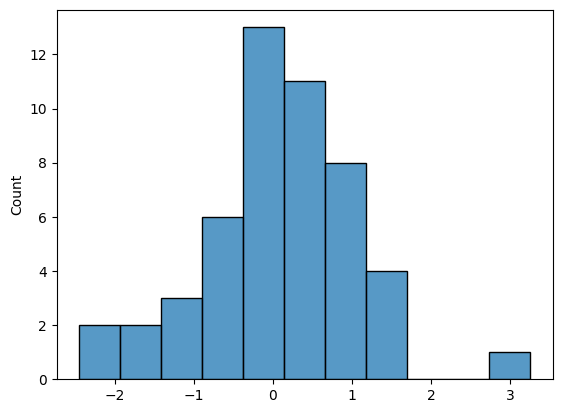

In [10]:
import seaborn as sns
sns.histplot(np.random.normal(0,1,50)) # normal distribution ka mean 0, st devi 1 and 50 points total

Make it automated

In [11]:
def randDist(N):
  sns.histplot(np.random.normal(0,1,N))

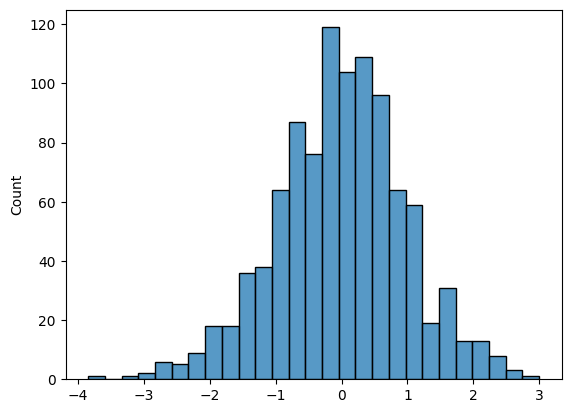

In [13]:
randDist(1000)

# Q9. Write a function for f1_score, that takes True Positive, False Positive, True Negative, and False Negative as input and output f1_score

In [14]:
tp = 1179
tn = 151470
fp = 976
fn = 457

In [16]:
precision = tp/(tp+fp) #= tp/(total predicted positive) P= precision, p = predicted
precision

0.5470997679814386

In [18]:
recall = tp/(tp+fn)
recall

0.7206601466992665

In [21]:
def f1_score(tp,tn,fp,fn, f1_for):
  if f1_for == "positive_cases":
     precision = tp/(tp+fp)
     recall = tp/(tp+fn)
     f1_score = 2*(precision*recall)/(precision+recall)
     return f1_score
  else :
     precision = tn/(tn+fn)
     recall = tn/(tn+fp)
     f1_score = 2*(precision*recall)/(precision+recall)
     return f1_score



In [22]:
tp = 1179
tn = 151470
fp = 976
fn = 457
f1_score(tp,tn,fp,fn,"positive_cases") # 4 int and 1 string input

0.6219994724347139

In [23]:
f1_score(tp,tn,fp,fn,"negative_cases") # 4 int and 1 string input

0.9952919608506666

# Q10. Explain the zip() and enumerate() functions

In [25]:
# ZIP
for x,y in zip(l1,l2):
  print(x,y)

# x from l1, and y from l2 ; at corresponding indeces

aman singh
prabhav singh
gufran ashraf


In [27]:
# enumerate makes list of tuples at corresponding indeces

for i in enumerate(list1):
  print(i)

# list ke element ko uske index ke sath return karega

(0, 1)
(1, 2)
(2, 3)
(3, 4)


# Q11.  2D list in python. How to define it, how to push input given by user in it. and how to print it

2D vector with user defined input size

vector<vector<int>(n,vector<int>(m,0)) # all values in it, as 0

or push krna ho pura 1D vector of any length in 2D vector:

vector<vector<int>>vect2D

vector<int>vect1D

vect1D.push_back(k) ... many elements

vect2D.push_back(vect1D) , so 1 row will be pushed in vect2D, that is a 2D vector

In case of array in C++, int arr[m][n]



In [28]:
# 1D list adding in 2D list

twoD_list = [] # empty 2D list

oneD_list1 = [1,2,3,4]
oneD_list2 = [5,6,7]
oneD_list3 = [8,9,10,11]

twoD_list.append(oneD_list1)
twoD_list.append(oneD_list2)
twoD_list.append(oneD_list3)

# so this will work as 2D vector or array, that's beauty of python.

print(twoD_list)

[[1, 2, 3, 4], [5, 6, 7], [8, 9, 10, 11]]


In [29]:
print(twoD_list[1][2]) # woho, it is also working. So python me list hi sb kuch hai


7


In [30]:
# accessing all the elements of 2D list
for i in range(len(twoD_list)):
  for j in range(len(twoD_list[i])):
    print(twoD_list[i][j],end=" ")
  print() # just for new line me nest row ke elements

# remember this throughout your life. Itna symple question, service now me aaya tha, and tumse syntax error solve nhi ho paya tha

1 2 3 4 
5 6 7 
8 9 10 11 


In [33]:
# let's modify elements of 2D list
for i in range(len(twoD_list)):
  for j in range(len(twoD_list[i])-1,-1,-1):# reverse printing of each rows,
      print(twoD_list[i][j],end=" ")
  print()


# range(len(twoD_list[i])-1,-1,-1) : ko bhi mind me rkhna. starting have to be included, and last will always be excluded, so index 0 ko bhi include krna hi to -1 tk chalo. -1 is compulsory for reverse traversal

4 3 2 1 
7 6 5 
11 10 9 8 


# Taking input of all elements of 2D list separatly similar to predefined arr[m][n] or vector<vector<int>(m,vector<int>(n))  or vector<in>v(n) [1D vector]

Conclusion ye hai ki fi fixed size 2D list banane ke liye All values ko kisi na kisi value se initialize krna hi padega, aur koi options nhi hai. None is best or 0 bhi use kr skte hain, as in vectors. We will have ultimately change values at the time of taking input so there is nothing to worry much abt None or 0 as taken initially

In [41]:
nrows = int(input())
ncols = int(input())

# creating nrows*ncols 2D list
two_D_list = [ [None]*ncols for _ in range(nrows) ] # still ncol ki lengths are variable

print(two_D_list) # alternate for loop lagakar c++ jaise bhi kr skte hain, but jb dirrect python functioality de rha to kyon mehnat karen

2
3
[[None, None, None], [None, None, None]]


In [40]:
nrows = int(input())
ncols = int(input())

# creating nrows*ncols 2D list
two_D_list = [ [None]*ncols for _ in range(nrows) ] # still ncol ki lengths are variable

# taking input in nrow*ncol 2D list
for i in range(nrows):
  for j in range(ncols):
    two_D_list[i][j]=int(input())


# display the twoD list
print(two_D_list)

2
3
1
2
3
4
5
6
[[1, 2, 3], [4, 5, 6]]


Additionally one more way, nrows to fixed krlo, but ncols are variables. i.e. vector me total number of 1D vectors fixed, but each 1D vector ki length variable mante hue, ncol ke barabr hi input do > ultimately nrows*ncols ki size ka hi 2D list banegi.

for 1D lists, we will have to use append functions

In [42]:
nrows = int(input("Enter number of rows: "))
ncols = int(input("Enter number of columns: "))

# Creating nrows*ncols 2D list
two_D_list = [[] for _ in range(nrows)]

# Taking input in nrows*ncols 2D list
for i in range(nrows):
    for j in range(ncols):
        value = int(input(f"Enter element for row {i+1}, column {j+1}: "))
        two_D_list[i].append(value)  # Append the value to the inner list

# Display the 2D list
for row in two_D_list:
    print(row)


# Successfully n*m vector creaeted. And this is simplest way and readablee code for this tast
# Let's use this in CP questions and ch


Enter number of rows: 3
Enter number of columns: 4
Enter element for row 1, column 1: 1
Enter element for row 1, column 2: 2
Enter element for row 1, column 3: 3
Enter element for row 1, column 4: 4
Enter element for row 2, column 1: 5
Enter element for row 2, column 2: 6
Enter element for row 2, column 3: 7
Enter element for row 2, column 4: 8
Enter element for row 3, column 1: 9
Enter element for row 3, column 2: 10
Enter element for row 3, column 3: 11
Enter element for row 3, column 4: 12
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
